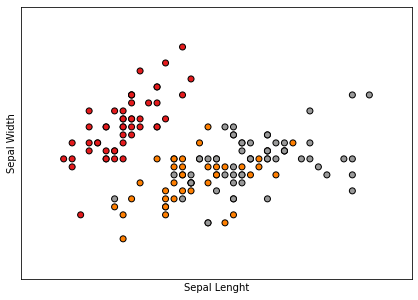

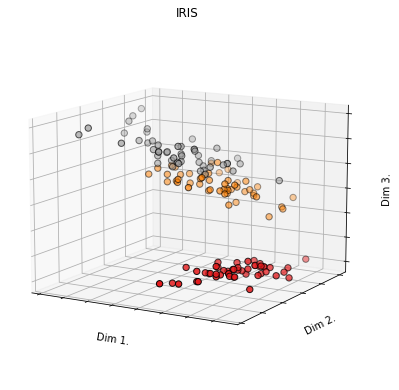

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

#1.
iris = datasets.load_iris()

X = iris.data[:,:2]#2D data
y = iris.target

x_min, x_max = X[:,0].min() - .5, X[:,0].max()+ .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max()+ .5

plt.figure(2, figsize = (7,5))
plt.clf()
#2D
plt.scatter( X[:,0], X[:,1], c=y, cmap= plt.cm.Set1, edgecolor = "k")
plt.xlabel("Sepal Lenght")
plt.ylabel("Sepal Width")

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())
#3D
fig = plt.figure(1, figsize= (7,5))
ax = Axes3D(fig,elev= 12, azim= 120)
ax.scatter(iris.data[:,0], iris.data[:,1],iris.data[:,2],
           c= y,cmap = plt.cm.Set1, edgecolor = "k", s = 40)
ax.set_title("IRIS")# definiton
ax.set_xlabel("Dim 1. ")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Dim 2. ")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Dim 3. ")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [2]:
#2 Classification for CSV file
import pandas as pd
  
df = pd.read_csv("iris2.csv")
  
df['variety'] = df['variety'].replace({'Setosa': '0'})
df['variety'] = df['variety'].replace({'Versicolor': '1'})
df['variety'] = df['variety'].replace({'Virginica': '2'})
  
# ilk satırı silme
df.to_csv("irisupdated2.csv", index=False)

In [3]:
#Remove first row
with open("irisupdated2.csv",'r') as file:
    with open("irisUpdated3.csv",'w') as file1:
        next(file)
        for line in file:
            file1.write(line)
            
      

In [4]:
#Shuffle CSV
import random

with open('irisUpdated3.csv', 'r') as r, open('irisshuffled.csv', 'w') as w:
    data = r.readlines()
    header, rows = data[0], data[1:]
    random.shuffle(rows)
    rows = '\n'.join([row.strip() for row in rows])
    w.write(header + rows)

In [5]:
#Upload new CSV file and convert str to float
from random import randrange
from csv import reader

def load_csv(filename):
    file = open(filename, "rt")
    lines = reader(file)
    dataset = list(lines)
    return dataset

def str2float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
        
filename = 'irisshuffled.csv'
dataset = load_csv(filename)
  
for i in range(len(dataset[0])):
    str2float(dataset, i)


In [6]:
#train and test data split %80train, %20 test
def train_test_split(dataset, split):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

train, test = train_test_split(dataset,0.8)

In [7]:
# %load HW1.py
"""
Created on Thu Jun 23 00:45:53 2021

@author: utku
"""


class DecisionTreeClassifier:

    def __init__(self, max_depth ,min_size = 10):
        self.max_depth = max_depth
        self.min_size = min_size
        
    def fit(self, X, y):
        self.tree = decisiontree(X,y,self.max_depth,self.min_size)
        
    def predict(self, X):
        predictions = list()
        for row in test:
            prediction = predict(self.tree, row)
            predictions.append(prediction)   
        return(predictions)
    
    
def decisiontree(train, test, max_depth, min_size):
	 tree = build(train, max_depth, min_size)
	 return tree

def build(train, max_depth, min_size):
	root = get_split(train)
	split(root, max_depth, min_size, 1)
	return root
    
def load_csv(filename):
	file = open(filename, "rt")
	lines = reader(file)
	dataset = list(lines)
	return dataset

def get_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}
 
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

def gini_index(groups, classes):

	n_instances = float(sum([len(group) for group in groups]))

	gini = 0.0
	for group in groups:
		size = float(len(group))

		if size == 0:
			continue
		score = 0.0

		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p

		gini += (1.0 - score) * (size / n_instances)
	return gini

def node_t(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])

	if not left or not right:
		node['left'] = node['right'] = node_t(left + right)
		return

	if depth >= max_depth:
		node['left'], node['right'] = node_t(left), node_t(right)
		return

	if len(left) <= min_size:
		node['left'] = node_t(left)
	else:
		node['left'] = get_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	
	if len(right) <= min_size:
		node['right'] = node_t(right)
	else:
		node['right'] = get_split(right)
		split(node['right'], max_depth, min_size, depth+1)


def str2floatumn_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

def train_test_split(dataset, split=0.80):
	train = list()
	train_size = split * len(dataset)
	dataset_copy = list(dataset)
	while len(train) < train_size:
		index = randrange(len(dataset_copy))
		train.append(dataset_copy.pop(index))
	return train, dataset_copy

def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']


clf = DecisionTreeClassifier(max_depth= 5)
clf.fit(train,test)
pred = clf.predict(test)
true_val = [row[-1] for row in test]#test verisi
print(pred)


[0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.0, 2.0, 2.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 2.0]


In [8]:
#Confusion Matrix result
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_val, pred)
print(cm)

[[14  0  0]
 [ 0  6  0]
 [ 0  1  9]]


In [9]:
#F1 Score result
from sklearn.metrics import f1_score
f1_score(true_val, pred, average=None)

array([1.        , 0.92307692, 0.94736842])

In [10]:
#Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(true_val, pred)

0.9666666666666667

In [11]:
#Precision Score
from sklearn.metrics import precision_score
precision_score(true_val, pred, average='weighted')

0.9714285714285714

In [12]:
#Recall score
from sklearn.metrics import recall_score
recall_score(true_val, pred, average=None)
#After all of these scores, my decisiontreeclassifier works well because all scores above %85.

array([1. , 1. , 0.9])

In [13]:
#fpr,tpr,threshold for Plottting ROC Curve 
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

    
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(true_val, pred,pos_label = 0)
fpr[1], tpr[1], _ = roc_curve(true_val, pred,pos_label = 1)
fpr[2], tpr[2], _ = roc_curve(true_val, pred,pos_label = 2)
for i in range(3):
    roc_auc[i] = auc(fpr[i], tpr[i])


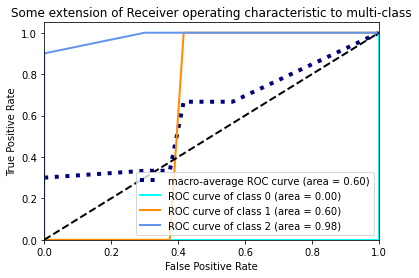

In [14]:
#Plotting ROC Curve
import numpy
n_classes = 3
lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += numpy.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()


plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
#class 0 looks pretty bad. I don't know why is it. Its opposite to Confusion Matrix. However, other classes look not bad. Probably someting wrong on curve